<a href="https://colab.research.google.com/github/dhyan1999/DL_ML/blob/master/Cifar100_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CIFAR 100 Using Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from keras.datasets import cifar100
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.transform import resize
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser



In [ ]:
num_classes = 100
nb_epochs = 10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [ ]:
classes=['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

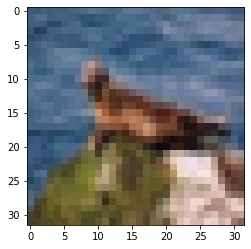

In [ ]:
plt.imshow(X_test[2])

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_test[:10]

array([[49],
       [33],
       [72],
       [51],
       [71],
       [92],
       [15],
       [14],
       [23],
       [ 0]])

In [ ]:
classes[y_test[2][0]]

'seal'

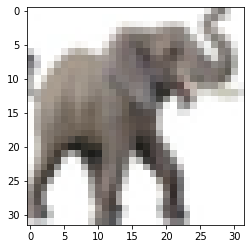

In [ ]:
plt.imshow(X_train[9])

In [ ]:
y_train[9]

array([31])

In [ ]:
classes[y_train[9][0]]

'elephant'

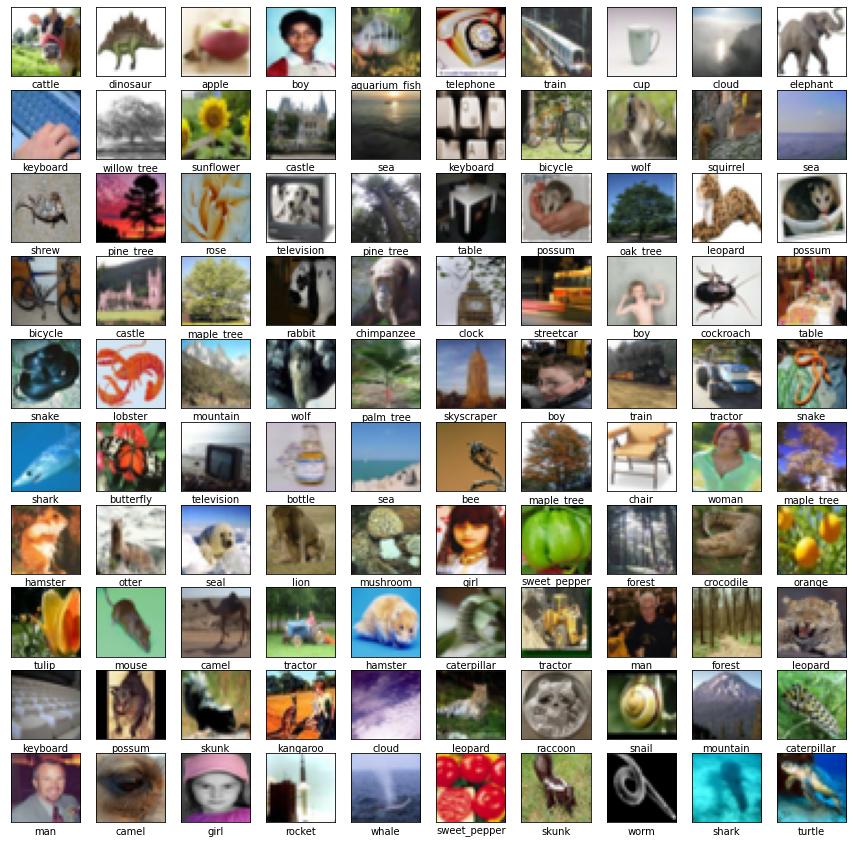

In [ ]:
# Checking all the images with labels
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i][0]])
plt.show()

In [ ]:
#Pre-process the data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [ ]:
y_testlabels = y_test
y_trainImages = y_train

In [ ]:
# Data Augmentation 
datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))
datagen.fit(X_train)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
# Model generation 
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

model = Sequential()
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
# Fully Connected Network 
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
 historytemp = model.fit_generator(datagen.flow(X_train, y_train,
                                  batch_size=64),
                                  steps_per_epoch=X_train.shape[0] // 64,
                                  epochs=13,
                                  validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/13
781/781 [==============================] - 257s 323ms/step - loss: 2.7718 - accuracy: 0.3402 - val_loss: 1.0106 - val_accuracy: 0.6990
Epoch 2/13
781/781 [==============================] - 251s 321ms/step - loss: 1.1837 - accuracy: 0.6622 - val_loss: 0.8625 - val_accuracy: 0.7402
Epoch 3/13
781/781 [==============================] - 250s 321ms/step - loss: 0.9780 - accuracy: 0.7148 - val_loss: 0.7664 - val_accuracy: 0.7694
Epoch 4/13
781/781 [==============================] - 250s 321ms/step - loss: 0.8651 - accuracy: 0.7413 - val_loss: 0.7377 - val_accuracy: 0.7780
Epoch 5/13
781/781 [==============================] - 250s 321ms/step - loss: 0.7873 - accuracy: 0.7648 - val_loss: 0.7311 - val_accuracy: 0.7813
Epoch 6/13
781/781 [==============================] - 250s 320ms/step - loss: 0.7229 - accuracy: 0.7794 - val_loss: 0.7179 - val_accuracy: 0.7874
Epoch 7/13
781/781 [==============================] - 250s 320ms/step - loss: 0.6800 - accuracy: 0.7907 - val_loss: 0.7074 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, None, None, None)  0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, None)  0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, None, None, None)  0         
_________________________________________________________________
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

  1/313 [..............................] - ETA: 26s - loss: 0.5996 - accuracy: 0.8438

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


313/313 [==============================] - 21s 68ms/step - loss: 0.7598 - accuracy: 0.7965


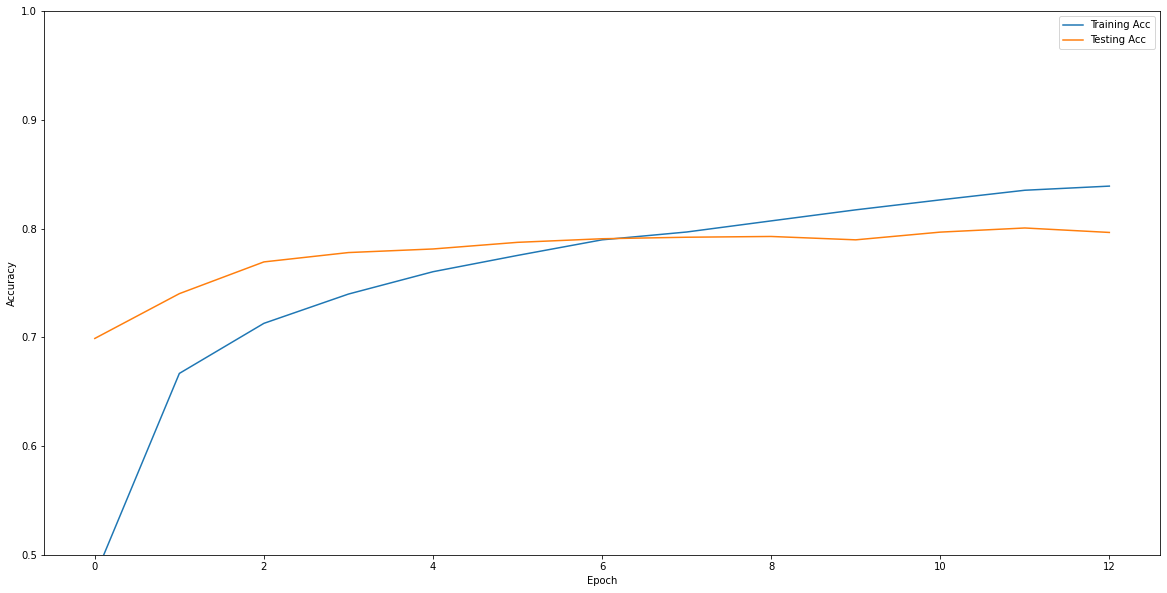

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(historytemp.history['accuracy'], label='Training Acc')
plt.plot(historytemp.history['val_accuracy'],label='Testing Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower_right')

test_loss, test_acc = model.evaluate(X_test, y_test)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[1.69174228e-07, 3.23710680e-09, 1.85129629e-05, 3.17632930e-06,
        1.36749923e-05, 6.06057583e-05, 9.14290865e-07, 7.97220594e-07,
        5.37178175e-06, 3.73385490e-07, 8.19376237e-06, 1.07488938e-06,
        7.89996004e-04, 2.58475811e-05, 1.11095673e-04, 5.42713394e-07,
        2.60184372e-08, 3.26906570e-06, 6.22779908e-08, 6.35214917e-07,
        1.07592246e-09, 1.60111995e-05, 8.18432454e-07, 5.88621015e-06,
        5.23243280e-08, 7.89752193e-08, 2.76415972e-06, 9.97379104e-08,
        2.31203989e-09, 1.11658292e-08, 1.01249789e-04, 1.56280657e-06,
        2.42779570e-04, 2.57593229e-06, 2.34060971e-09, 1.86192865e-05,
        2.25177587e-07, 5.24344068e-05, 1.97303729e-09, 1.87387954e-07,
        3.92109655e-07, 2.74340617e-09, 5.98101977e-08, 2.65918931e-08,
        1.80760196e-07, 2.54912425e-06, 1.81687181e-04, 1.10444454e-07,
        6.98035080e-07, 7.18851388e-02, 3.85334431e-08, 2.44501848e-07,
        1.55595694e-06, 7.19184499e-08, 1.02744639e-06, 6.761438

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[68, 33, 72, 51, 71, 6, 29, 75, 23, 0]

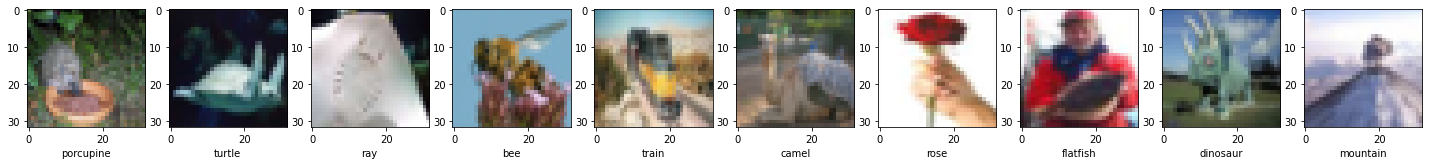

In [ ]:
## Actual Testing Data with Images & Labels

fig = plt.figure(figsize=(25, 10))
c=1
for i in y_classes[:10]:
  a = fig.add_subplot(1, 10, c)
  plt.imshow(X_test[i])
  plt.xlabel(classes[y_test[i][0]])
  c = c + 1

In [ ]:
y_testlabels = y_testlabels.reshape(-1,)
y_testlabels[:10]

array([49, 33, 72, 51, 71, 92, 15, 14, 23,  0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


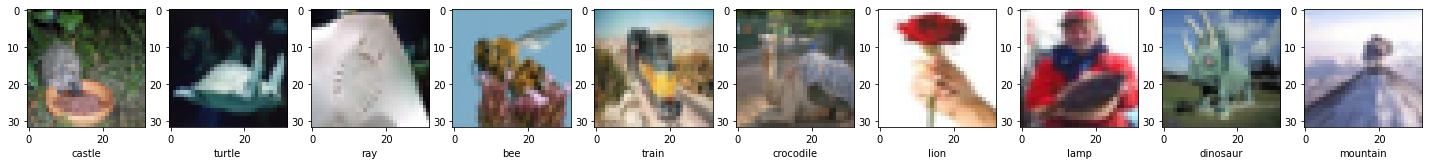

In [ ]:
## Actual prediction through Algorithm using Testing Images & Predicted labels with 80% Accuracy 
## Feature Extraction
fig = plt.figure(figsize=(25, 10))
c=1
x=1
for i in y_classes[:10]:
  a = fig.add_subplot(1, 10, c)
  plt.imshow(X_test[i])
  c = c + 1
for i in y_testlabels[:10]:
  a = fig.add_subplot(1, 10, x)
  plt.xlabel(classes[y_test[i][0]])
  x = x + 1